In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE  
from sklearn.metrics import silhouette_score




In [9]:

DF= pd.read_csv("D:\AI & data\dataframe-university\Students_Grading_Dataset.csv")

DF.head()




,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [82]:
DF.isna().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

<Axes: >

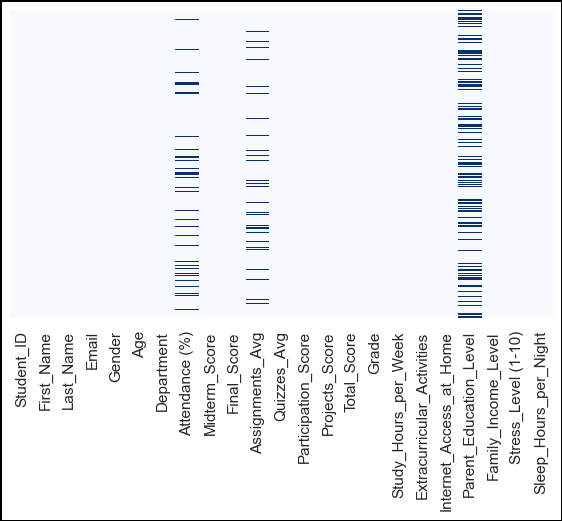

In [83]:
plt.figure(figsize=(7,4),edgecolor='black', linewidth=1)
sns.heatmap(DF.isna(),yticklabels=False,cbar=False,cmap='Blues')

In [84]:

DF.drop([ 'Assignments_Avg','Attendance (%)','Parent_Education_Level'], axis=1 ,inplace=True)



In [85]:
DF.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Midterm_Score,Final_Score,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,55.03,57.82,74.06,3.99,85.90,56.09,F,6.2,No,Yes,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.23,45.80,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,67.05,93.68,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,47.79,80.63,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,46.59,78.89,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High,2,7.1


<Axes: >

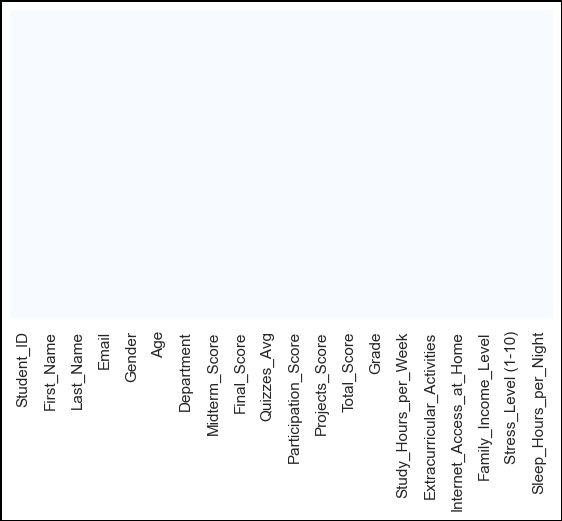

In [86]:
plt.figure(figsize=(7,4),edgecolor='black', linewidth=1)
sns.heatmap(DF.isna(),yticklabels=False,cbar=False,cmap='Blues')

In [87]:
DF.isna().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Midterm_Score                 0
Final_Score                   0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [88]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Midterm_Score               5000 non-null   float64
 8   Final_Score                 5000 non-null   float64
 9   Quizzes_Avg                 5000 non-null   float64
 10  Participation_Score         5000 non-null   float64
 11  Projects_Score              5000 non-null   float64
 12  Total_Score                 5000 non-null   float64
 13  Grade                       5000 

In [89]:
DF.duplicated(subset=None)

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [90]:
DF[DF.Email == 'student0@university.com']

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Midterm_Score,Final_Score,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,55.03,57.82,74.06,3.99,85.9,56.09,F,6.2,No,Yes,Medium,5,4.7


In [91]:
DF['Full Name'] = DF['First_Name'] + '      ' + DF['Last_Name'] 
DF.drop(['First_Name', 'Last_Name'], axis=1, inplace=True)


DF = DF[['Student_ID', 'Full Name'] + [col for col in DF.columns if col not in ['Student_ID', 'Full Name']]]

DF.head()


,Student_ID,Full Name,Email,Gender,Age,Department,Midterm_Score,Final_Score,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar Williams,student0@university.com,Female,22,Engineering,55.03,57.82,74.06,3.99,85.90,56.09,F,6.2,No,Yes,Medium,5,4.7
1,S1001,Maria Brown,student1@university.com,Male,18,Engineering,97.23,45.80,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Medium,4,9.0
2,S1002,Ahmed Jones,student2@university.com,Male,24,Business,67.05,93.68,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Low,6,6.2
3,S1003,Omar Williams,student3@university.com,Female,24,Mathematics,47.79,80.63,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High,3,6.7
4,S1004,John Smith,student4@university.com,Female,23,CS,46.59,78.89,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High,2,7.1


In [92]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   Full Name                   5000 non-null   object 
 2   Email                       5000 non-null   object 
 3   Gender                      5000 non-null   object 
 4   Age                         5000 non-null   int64  
 5   Department                  5000 non-null   object 
 6   Midterm_Score               5000 non-null   float64
 7   Final_Score                 5000 non-null   float64
 8   Quizzes_Avg                 5000 non-null   float64
 9   Participation_Score         5000 non-null   float64
 10  Projects_Score              5000 non-null   float64
 11  Total_Score                 5000 non-null   float64
 12  Grade                       5000 non-null   object 
 13  Study_Hours_per_Week        5000 

D:\app\XboxGames\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


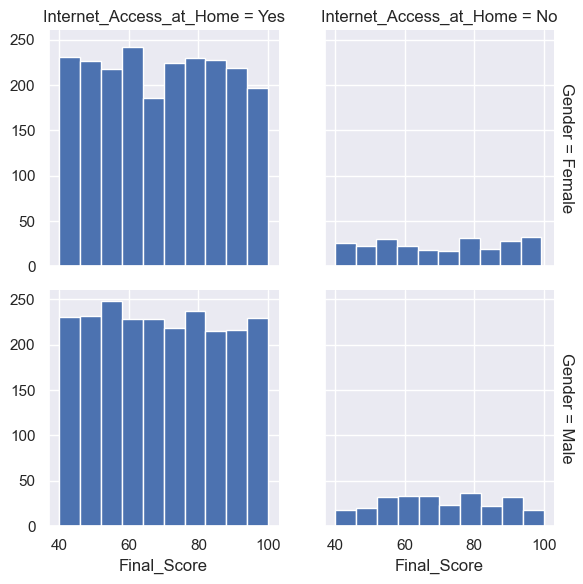

In [11]:
g = sns.FacetGrid(DF, col='Internet_Access_at_Home', row='Gender', margin_titles=True)
g = g.map(plt.hist, 'Final_Score')


plt.subplots_adjust(hspace=0.1, wspace=0.2)  

In [12]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Family_Income_Level','Grade']

lab = LabelEncoder()

# استخدام for و enumerate لتحويل الأعمدة
for i, col in enumerate(columns_to_encode):
    DF[col] = lab.fit_transform(DF[col])
    
    
DF.head()


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Midterm_Score,Final_Score,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,0,22,Engineering,55.03,57.82,74.06,3.99,85.90,56.09,4,6.2,0,1,2,5,4.7
1,S1001,Maria,Brown,student1@university.com,1,18,Engineering,97.23,45.80,94.24,8.32,55.65,50.64,0,19.0,0,1,2,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,1,24,Business,67.05,93.68,85.70,5.05,73.79,70.30,3,20.7,0,1,1,6,6.2
3,S1003,Omar,Williams,student3@university.com,0,24,Mathematics,47.79,80.63,93.51,6.54,92.12,61.63,0,24.8,1,1,0,3,6.7
4,S1004,John,Smith,student4@university.com,0,23,CS,46.59,78.89,83.70,5.97,68.42,66.13,4,15.4,1,1,0,2,7.1


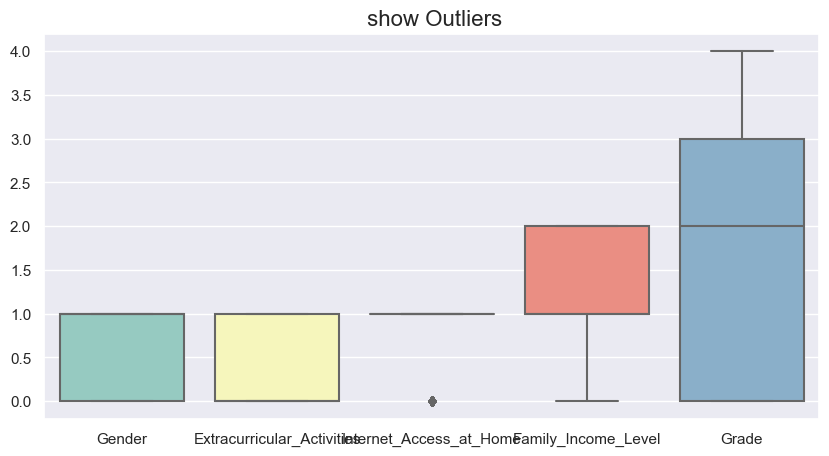

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=DF[columns_to_encode], palette="Set3")
plt.title(' show Outliers', fontsize=16)
# plt.xticks(rotation=30)
# plt.grid(axis='y', alpha=0.3)
# plt.tight_layout()
plt.show()

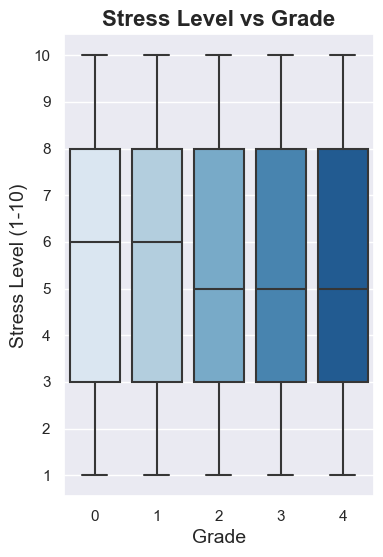

In [15]:
plt.figure(figsize=(4, 6))  # الحجم الطولي المناسب
sns.boxplot(data=DF, y='Stress_Level (1-10)', x='Grade', palette='Blues')  # تغيير الأماكن بين x و y
plt.title('Stress Level vs Grade', fontsize=16, fontweight='bold')
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Stress Level (1-10)', fontsize=14)
plt.yticks(range(1, 11))
plt.savefig('3_stress_vs_grade_simple_vertical.png', dpi=300)

plt.show()


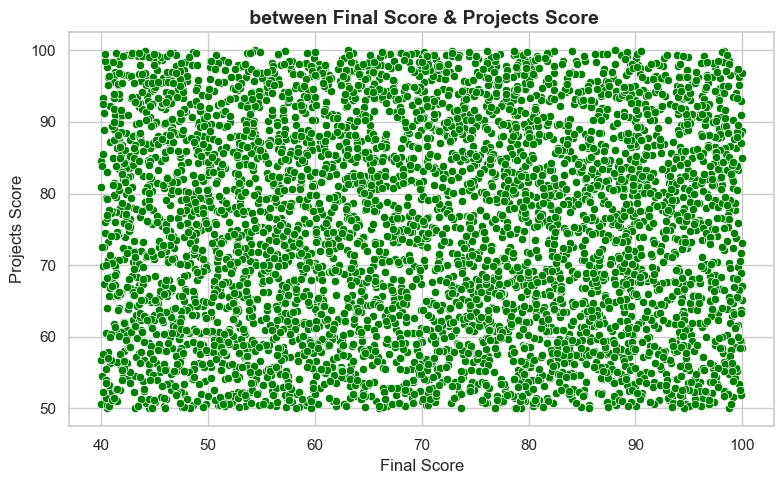

In [122]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=DF, x='Final_Score', y='Projects_Score', color='green')
plt.title(' between Final Score & Projects Score', fontsize=14, fontweight='bold')
plt.xlabel('Final Score', fontsize=12)
plt.ylabel('Projects Score', fontsize=12)
plt.tight_layout()

plt.savefig('scatter_final_vs_projects.png', dpi=300)
plt.show()

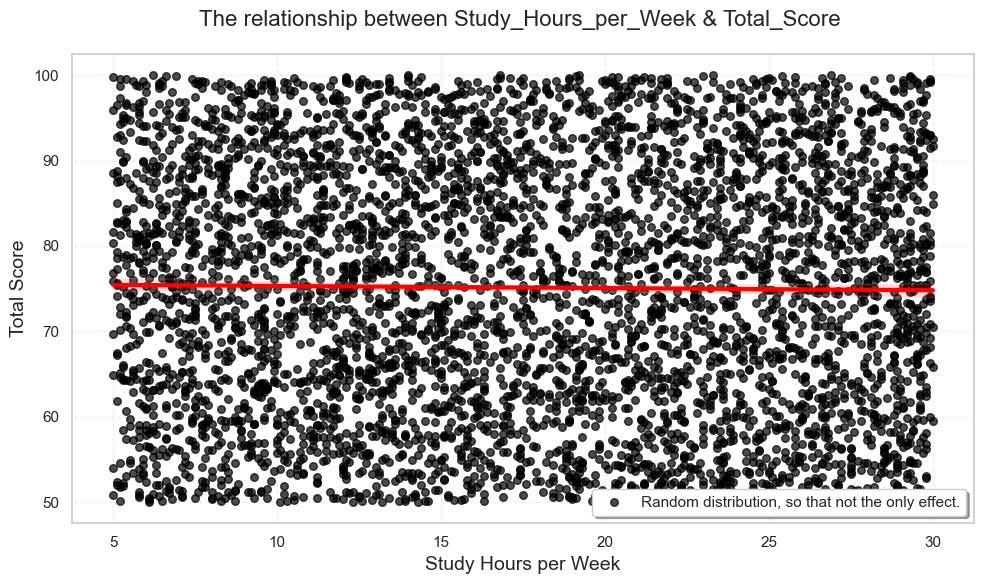

In [120]:
plt.figure(figsize=(10, 6))

# رسم scatter plot مع خط الاتجاه
sns.regplot(data=DF, x='Study_Hours_per_Week', y='Total_Score', 
           scatter_kws={'color': 'black', 's': 30, 'alpha': 0.7},
           line_kws={'color': 'red', 'linewidth': 3})

# إضافة عناوين وتنسيقات
plt.title('The relationship between Study_Hours_per_Week & Total_Score ', fontsize=16, pad=20)
plt.xlabel('Study Hours per Week', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(['Random distribution, so that not the only effect.'], 
           loc='lower right', frameon=True, shadow=True)


# تحسين المساحة وحفظ الصورة
plt.tight_layout()
plt.savefig('scatter_study_hours_vs_total_score.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
scaler = StandardScaler()
scaler.fit(DF[['Study_Hours_per_Week']])
scaler.transform(DF[['Study_Hours_per_Week']])

array([[-1.57507144],
       [ 0.18434568],
       [ 0.41801826],
       ...,
       [ 0.98158156],
       [-0.21427226],
       [ 1.5863812 ]])

In [100]:


# استخراج الأعمدة الرقمية
value = DF.select_dtypes(include=['int64', 'float64']).dropna()

# تطبيع البيانات
scaler = StandardScaler()
scaled_value = scaler.fit_transform(value)  # هنا بنستخدم value مش DF

# تدريب KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_value)

# إضافة الكلاسترز للداتا الأصلية



D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

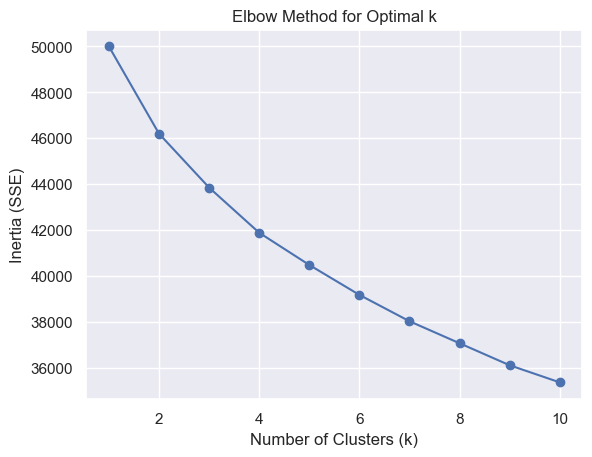

In [101]:
#Based on the elbow point, the best Number of Clusters is from 4 to 6 
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_value) 
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.show()


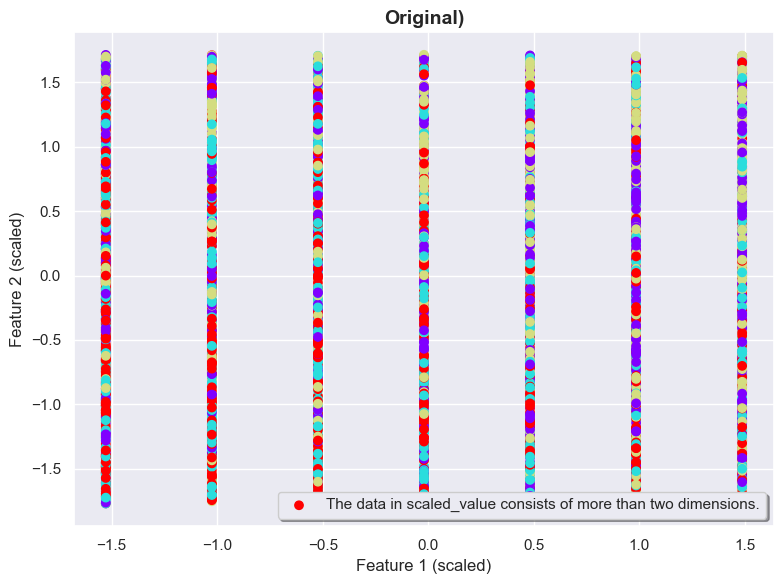

In [67]:


plt.figure(figsize=(8, 6))
plt.scatter(scaled_value[:, 0], scaled_value[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('Original)', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(['The data in scaled_value consists of more than two dimensions.'], 
           loc='lower right', frameon=True, shadow=True)

plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:


# استخراج الأعمدة الرقمية
value = DF.select_dtypes(include=['int64', 'float64']).dropna()

# تطبيع البيانات
scaler = StandardScaler()
scaled_value = scaler.fit_transform(value)  # هنا بنستخدم value مش DF

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_value)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_data)


# إضافة الكلاسترز للداتا الأصلية



D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

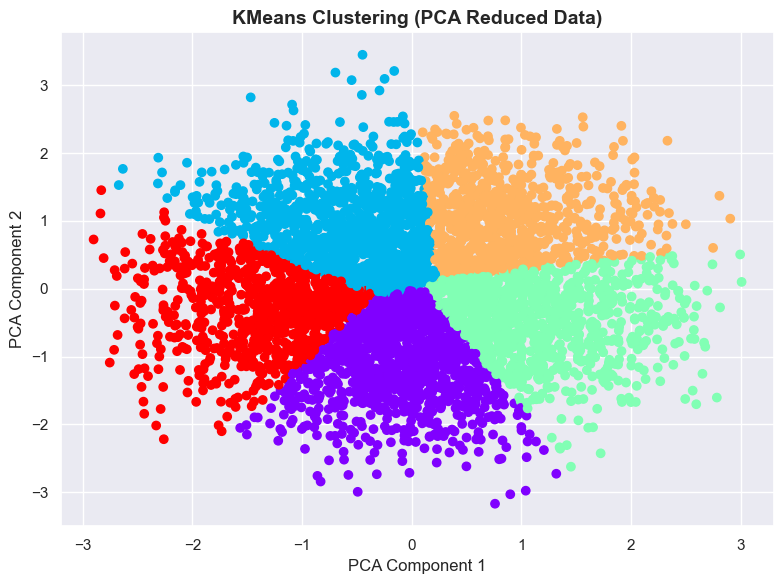

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('KMeans Clustering (PCA Reduced Data)', fontsize=14, fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:


# استخراج الأعمدة الرقمية
value = DF.select_dtypes(include=['int64', 'float64']).dropna()

# تطبيع البيانات
scaler = StandardScaler()
scaled_value = scaler.fit_transform(value)  # هنا بنستخدم value مش DF

# تدريب KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_data)
tsne = TSNE(n_components=2, random_state=50)
reduced_data = tsne.fit_transform(scaled_value)
# إضافة الكلاسترز للداتا الأصلية



D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


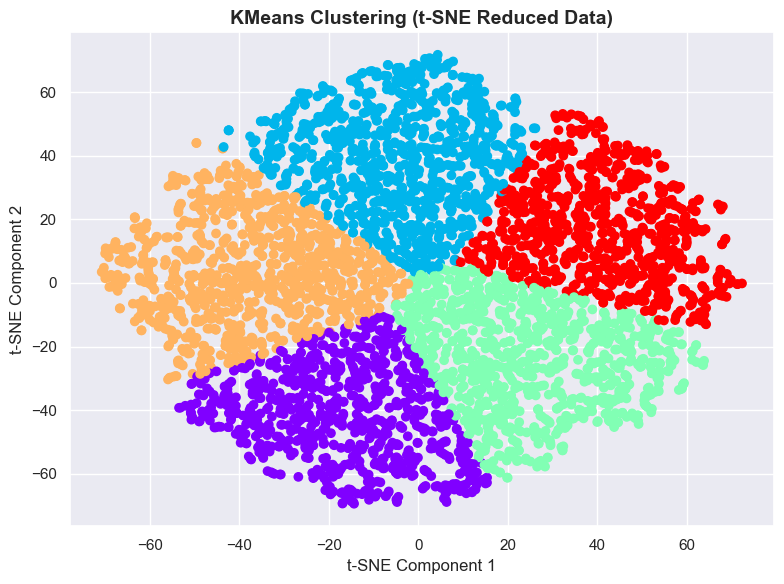

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('KMeans Clustering (t-SNE Reduced Data)', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

D:\app\XboxGames\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


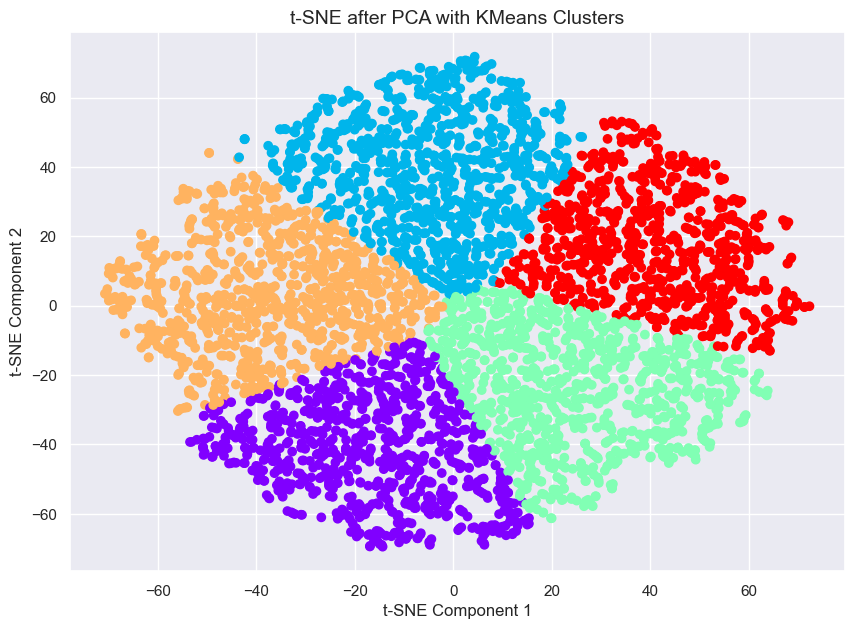

In [24]:


# 1. PCA لتقليل الأبعاد إلى 12 مكون (أو يمكنك تقليص العدد بناءً على البيانات)
pca = PCA(n_components=10)  # هنا اخترنا 12 لأنها أكبر قيمة مسموح بها بناءً على البيانات
pca_result = pca.fit_transform(scaled_value)

# 2. t-SNE لتقليل الأبعاد إلى 2D بعد تطبيق PCA
tsne = TSNE(n_components=2, random_state=50)
tsne_result = tsne.fit_transform(pca_result)

# 3. تدريب KMeans على البيانات المخفضة باستخدام PCA
kmeans = KMeans(n_clusters=5, random_state=42)  # يمكنك تعديل n_clusters حسب الحاجة
kmeans.fit(tsne_result)  # تدريب KMeans على نتائج t-SNE المخفضة

# رسم النتائج
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('t-SNE after PCA with KMeans Clusters', fontsize=14)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [98]:
#Silhouette Score ranges from -1 to 1

sil_score = silhouette_score(tsne_result, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.34857502579689026
